In [0]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [0]:
X, y = mnist["data"], mnist["target"]
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [0]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

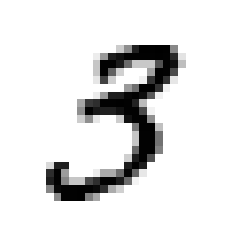

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [11]:
import matplotlib
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [0]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [0]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [15]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(200):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 0 cost:  8.666698304477155
Epoch 100 cost:  0.8124938757301468
Final cost: 0.6356162777158434


In [16]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 850    0   29   19    3   41   13    7    9    8]
 [   0 1078   15    3    3    6    6   23   18    5]
 [  22   14  802   36    9   20   32   23   34    8]
 [  18    5   34  776    4   81    4   24   78   14]
 [   2    1   24    5  787   16   27   28   28  103]
 [  34    5    5   65   15  592   33    6   62   19]
 [  20    7   37    8   29   37  823    4   13    9]
 [  16    2   17   33   18   20    2  853   16   54]
 [  15   23   57   51   17   52   15    9  661   36]
 [   3    0   12   14   97   27    3   51   55  753]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       979
           1       0.95      0.93      0.94      1157
           2       0.78      0.80      0.79      1000
           3       0.77      0.75      0.76      1038
           4       0.80      0.77      0.79      1021
           5       0.66      0.71      0.69       836
           6       0.86      0.83      0.85       987
           7       0.83      0.83   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
